In [720]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset: Open Power System Data

In this task you'll be working with daily time series of [Open Power System Data (OPSD)](https://open-power-system-data.org/) for Germany that has been [rapidly expanding its renewable energy production in recent years](https://www.independent.co.uk/environment/renewable-energy-germany-six-months-year-solar-power-wind-farms-a8427356.html). The dataset includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

* `Date` — The date (yyyy-mm-dd format)
* `Consumption` — Electricity consumption in GWh
* `Wind` — Wind power production in GWh
* `Solar` — Solar power production in GWh
* `Wind+Solar` — Sum of wind and solar power production in GWh

# Data Loading

## Task 1. Load the data: Part I

Load the CSV file `opsd_germany_daily.csv` into pandas DataFrame:

In [721]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv")

In [722]:
opsd_daily.shape

(4383, 5)

In [723]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [724]:
opsd_daily['DateDT'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily_with_dt = opsd_daily
opsd_daily_with_dt.dtypes


Date                   object
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
DateDT         datetime64[ns]
dtype: object

In [725]:
first3 = pd.DataFrame(opsd_daily).head(3).reset_index()
first3

,index,Date,Consumption,Wind,Solar,Wind+Solar,DateDT
0,0,2006-01-01,1069.184,NaN,NaN,NaN,2006-01-01
1,1,2006-01-02,1380.521,NaN,NaN,NaN,2006-01-02
2,2,2006-01-03,1442.533,NaN,NaN,NaN,2006-01-03


In [726]:
last3 = pd.DataFrame(opsd_daily).tail(3)
last3

,Date,Consumption,Wind,Solar,Wind+Solar,DateDT
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017-12-29
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017-12-30
4382,2017-12-31,1107.11488,721.176,19.980,741.156,2017-12-31


In [727]:
opsd_daily.describe()

,Consumption,Wind,Solar,Wind+Solar,DateDT
count,4383.000000,2920.000000,2188.000000,2187.000000,4383
mean,1338.675836,164.814173,89.258695,272.663481,2012-01-01 00:00:00
min,842.395000,5.757000,1.968000,21.478000,2006-01-01 00:00:00
25%,1217.859000,62.353250,35.179250,172.185500,2008-12-31 12:00:00
50%,1367.123000,119.098000,86.407000,240.991000,2012-01-01 00:00:00
75%,1457.761000,217.900250,135.071500,338.988000,2014-12-31 12:00:00
max,1709.568000,826.278000,241.580000,851.556000,2017-12-31 00:00:00
std,165.775710,143.692732,58.550099,146.319884,NaN


In [728]:
print(opsd_daily['Date'].astype('object').describe())

count           4383
unique          4383
top       2006-01-01
freq               1
Name: Date, dtype: object


We see that `Date` column is loaded as plain strings and some values are missing for `Wind` and `Solar` columns.

## Task 2. Load the Data: Part II

Load the file into the same variable, but now make pandas to parse the dates and set them as DataFrame index.

In [729]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv")
opsd_daily.info


<bound method DataFrame.info of             Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]>

Drop rows that contain `NA` values.

In [730]:
opsd_daily.dropna().describe()

,Consumption,Wind,Solar,Wind+Solar
count,2187.000000,2187.000000,2187.000000,2187.000000
mean,1347.519037,183.431878,89.231604,272.663481
std,166.551363,153.390542,58.549772,146.319884
min,899.827000,6.511000,1.968000,21.478000
25%,1222.042000,72.367000,35.161500,172.185500
50%,1380.220000,136.842000,86.390000,240.991000
75%,1460.072500,245.027500,135.038000,338.988000
max,1682.002000,826.278000,241.580000,851.556000


In [731]:
opsd_daily.dropna().info

<bound method DataFrame.info of             Date  Consumption     Wind   Solar  Wind+Solar
2191  2012-01-01    948.12800  227.465   6.587     234.052
2192  2012-01-02   1269.58100  207.327   6.574     213.901
2193  2012-01-03   1334.74500  473.468  24.679     498.147
2194  2012-01-04   1347.13600  499.804  14.681     514.485
2195  2012-01-05   1376.65800  523.851   5.071     528.922
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[2187 rows x 5 columns]>

## Task 3. Date Feature Extraction

Add columns with year, month, and weekday name.

In [732]:
print(opsd_daily.dtypes)

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


In [733]:

print(opsd_daily_with_dt.dtypes)

Date                   object
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
DateDT         datetime64[ns]
dtype: object


In [734]:
opsd_daily_with_dt.DateDT

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: DateDT, Length: 4383, dtype: datetime64[ns]

In [735]:
opsd_daily.sample(3)

,Date,Consumption,Wind,Solar,Wind+Solar
770,2008-02-10,1179.200,NaN,NaN,NaN
2939,2014-01-18,1353.455,162.727,35.464,198.191
1795,2010-12-01,1709.568,336.859,NaN,NaN


In [736]:
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"])
opsd_daily["Year"] = opsd_daily["Date"].dt.year
opsd_daily["Weekday"] = opsd_daily["Date"].dt.month
opsd_daily["Month"] = opsd_daily["Date"].dt.month


# Exploring the data

## Task 4. Indexing with dates

Select the data for a single day 24 Aug, 2017.

In [737]:
aug24_2017 = opsd_daily.loc[(opsd_daily['Date'] == '2017-08-24')]
aug24_2017

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
4253,2017-08-24,1381.885,188.635,146.341,334.976,2017,8,8


In [738]:
aug2017_first10 = opsd_daily.loc[(opsd_daily['Date'] >= '2017-08-01')& (opsd_daily['Date'] <= '2017-08-10')]
aug2017_first10

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
4230,2017-08-01,1364.819,100.080,159.889,259.969,2017,8,8
4231,2017-08-02,1365.735,103.491,165.591,269.082,2017,8,8
4232,2017-08-03,1389.445,402.361,120.167,522.528,2017,8,8
4233,2017-08-04,1349.423,455.379,145.631,601.010,2017,8,8
4234,2017-08-05,1130.134,232.881,148.611,381.492,2017,8,8
4235,2017-08-06,1024.324,168.420,164.458,332.878,2017,8,8
4236,2017-08-07,1302.062,123.843,216.117,339.960,2017,8,8
4237,2017-08-08,1343.899,247.468,143.742,391.210,2017,8,8
4238,2017-08-09,1342.432,208.824,169.034,377.858,2017,8,8
4239,2017-08-10,1351.491,100.274,71.160,171.434,2017,8,8


Select the data for a period of Aug, 2017.

In [739]:
aug2017 = opsd_daily.loc[(opsd_daily['Date'] >= '2017-08-01')& (opsd_daily['Date'] <= '2017-08-31')]
aug2017

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
4230,2017-08-01,1364.81900,100.080,159.889,259.969,2017,8,8
4231,2017-08-02,1365.73500,103.491,165.591,269.082,2017,8,8
4232,2017-08-03,1389.44500,402.361,120.167,522.528,2017,8,8
4233,2017-08-04,1349.42300,455.379,145.631,601.010,2017,8,8
4234,2017-08-05,1130.13400,232.881,148.611,381.492,2017,8,8
4235,2017-08-06,1024.32400,168.420,164.458,332.878,2017,8,8
4236,2017-08-07,1302.06200,123.843,216.117,339.960,2017,8,8
4237,2017-08-08,1343.89900,247.468,143.742,391.210,2017,8,8
4238,2017-08-09,1342.43200,208.824,169.034,377.858,2017,8,8
4239,2017-08-10,1351.49100,100.274,71.160,171.434,2017,8,8


Calculate the sum of energy consumption and the sum of wind and solar energy production for the period of Aug, 2017.

In [740]:
print("Consuption: ", opsd_daily[(opsd_daily['Date'] >= '2017-08-01') & (opsd_daily['Date'] <= '2017-08-31')]['Consumption'].sum())

Consuption:  40029.77368


In [741]:
print("Green Energy Production: ",opsd_daily[(opsd_daily['Date'] >= '2017-08-01') & (opsd_daily['Date'] <= '2017-08-31')]['Wind+Solar'].sum())

Green Energy Production:  10102.605999999998


## Task 5. Visualizing time series data

I recommend using this parameter for your charts to make them bigger. Then whenever you call `plot` method, just pass this keyword argument: `figsize=figsize`. You can play around and find what are the best options for you.

In [742]:
figsize = (11, 5)

In [743]:
# here i dropped all  nan values to ignore all years without usage (before 2012) in my graph
opsd_daily = opsd_daily.dropna()

Create a line plot of the full time series of Germany's daily electricity consumption, using the DataFrame's `plot()` method.

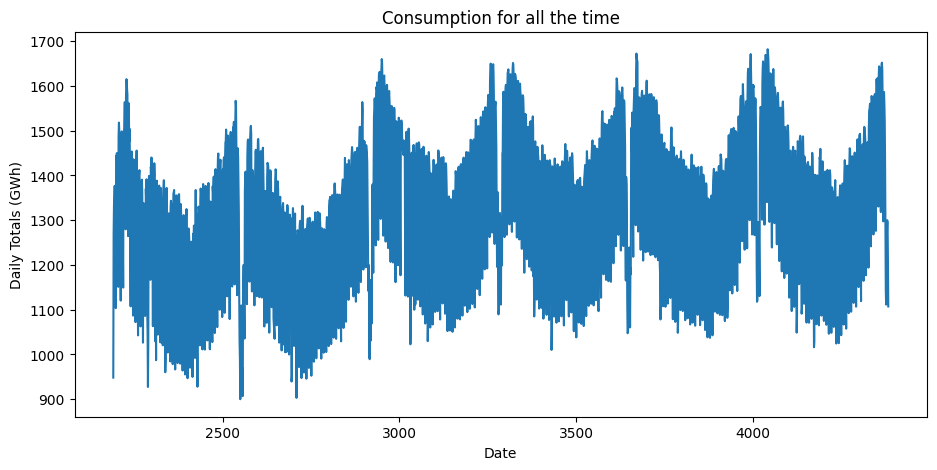

In [744]:
opsd_daily['Consumption'].plot(figsize = (11, 5), title='Consumption for all the time')
plt.xlabel('Date')
plt.ylabel('Daily Totals (GWh)')
plt.show()

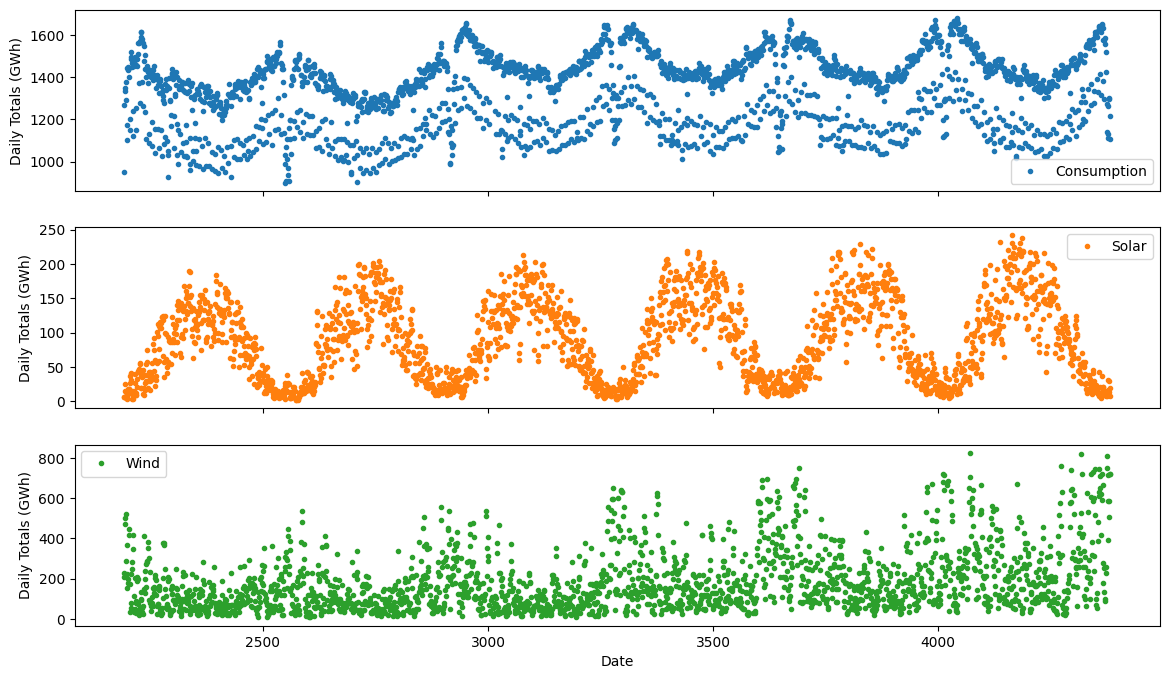

In [745]:
axes = opsd_daily[['Consumption', 'Solar', 'Wind']].plot(style='.', figsize=(14, 8), subplots=True)
for row, variable in zip(axes, ['Daily Totals (GWh)', 'Daily Totals (GWh)', 'Daily Totals (GWh)']):
    row.set_xlabel('Date')
    row.set_ylabel(variable)
plt.show()

We can see that the `plot()` method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful. However, with so many data points, the line plot is crowded and hard to read. Plot the data as dots instead and add the `Solar` and `Wind` power production values using `subplots=True`. Also, you can increase the figure size to an appropriate size.

We can already see some interesting patterns emerge:

* Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
* Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
* Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
* Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
* There appears to be a strong increasing trend in wind power production over the years.

All three time series clearly exhibit periodicity — often referred to as **seasonality** in time series analysis—in which a pattern repeats again and again at regular time intervals. The `Consumption`, `Solar`, and `Wind` time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. However, seasonality in general does not have to correspond with the meteorological seasons. For example, retail sales data often exhibits yearly seasonality with increased sales in November and December, leading up to the holidays.

Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany's electricity consumption, corresponding with weekdays and weekends. Now plot the time series in a single 2017 year to investigate further.

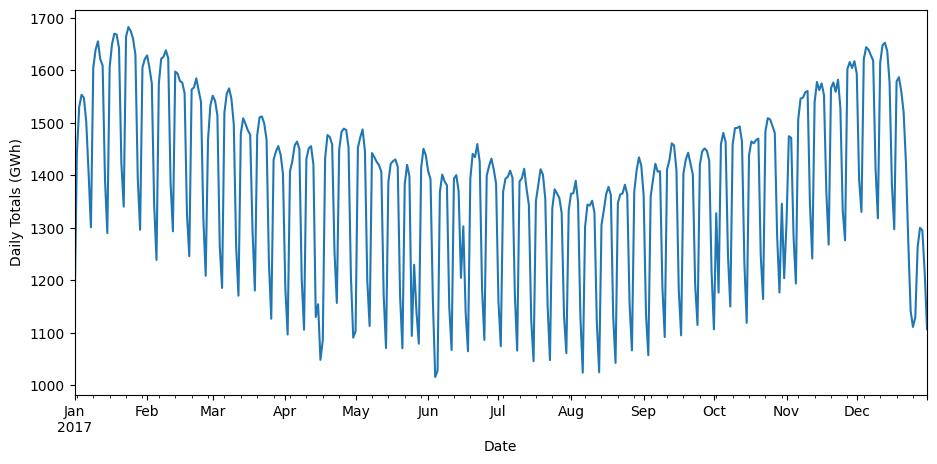

In [746]:
opsd_daily.set_index('Date', inplace=True)
seasons2017 = opsd_daily[(opsd_daily.index >= '2017-01-01') & (opsd_daily.index <= '2017-12-31')]
seasons2017['Consumption'].plot(figsize=(11, 5))
plt.xlabel('Date')
plt.ylabel('Daily Totals (GWh)')
plt.show()


Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

Plot the consumption only for January and February 2017.

<Axes: title={'center': 'Consumption (Jan - Feb, 2017)'}, xlabel='Date', ylabel='Daily totals (GWh)'>

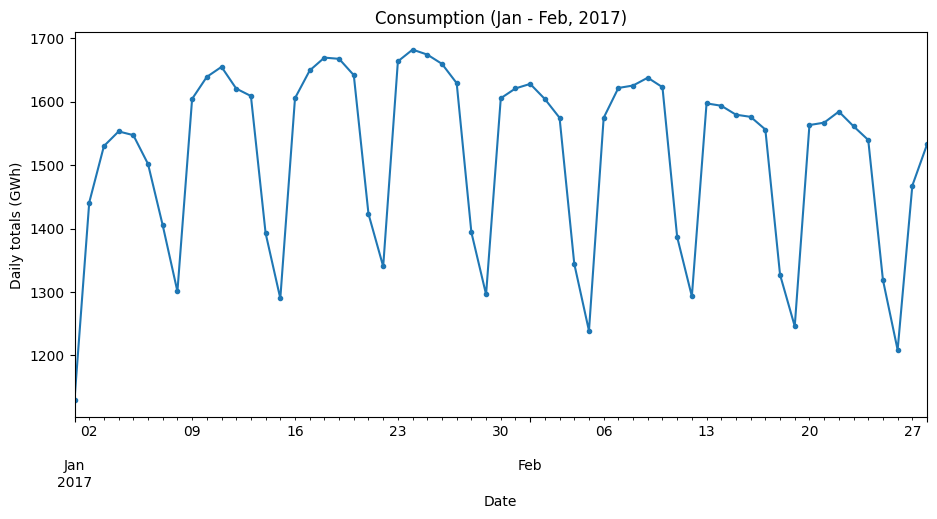

In [747]:
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-02-28")
opsd_daily.loc[start_date:end_date]['Consumption'].plot(figsize=figsize, kind="line",marker="." , ylabel="Daily totals (GWh)", title= "Consumption (Jan - Feb, 2017)")


As we suspected, consumption is highest on weekdays and lowest on weekends.

## Task 6. Resampling the data to know trends

Resample the data to a weekly mean time series.

In [748]:
opsd_weekly = opsd_daily.resample("w").mean()
opsd_weekly.head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
Date,,,,,,,
2012-01-01,948.128000,227.465000,6.587000,234.052000,2012.0,1.0,1.0
2012-01-08,1271.200857,368.550571,10.960000,379.510571,2012.0,1.0,1.0
2012-01-15,1361.100714,227.979571,19.160286,247.139857,2012.0,1.0,1.0


In [749]:
opsd_mothly = opsd_daily.resample("M").sum()
opsd_mothly = opsd_mothly.drop(columns=[ "Year", "Month", "Weekday"])
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
Date,,,,,,,
2012-01-31,41894.678,7040.795,537.740,7578.535,62372,31,31
2012-02-29,41373.321,4576.384,1046.718,5623.102,58348,58,58
2012-03-31,40137.196,4028.524,2346.897,6375.421,62372,93,93


Plot the daily and weekly `Solar` time series together over a single six-month period to compare them.

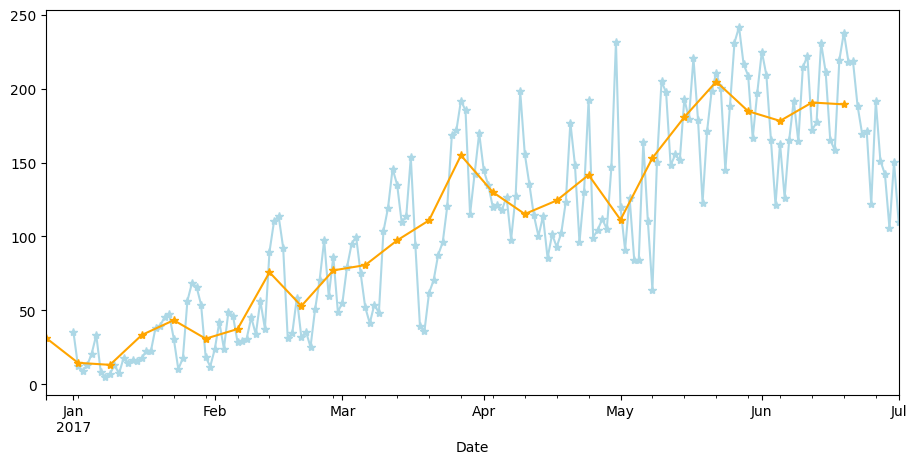

In [750]:
sixmonths_day = opsd_daily[(opsd_daily.index >= '2017-01-01') & (opsd_daily.index <= '2017-07-01')]
sixmonths_week = opsd_weekly[(opsd_weekly.index >= '2017-01-01') & (opsd_weekly.index <= '2017-07-01')]
sixmonths_day['Solar'].plot(style='-*' , color = "lightblue", figsize=(11, 5), subplots=True)
sixmonths_week["Solar"].plot(style='-*', color="orange", figsize=(11, 5), subplots=True, label="Weekly Avg")
plt.show()


We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

Now let's resample the data to monthly frequency, aggregating with sum totals instead of the mean.

In [751]:
first2of2012 = opsd_daily.loc[(opsd_daily.index >= '2012-01-01') & (opsd_daily.index <= '2012-03-30')]
first2of2012[['Consumption', 'Solar', 'Wind']].resample('M').sum()

,Consumption,Solar,Wind
Date,,,
2012-01-31,41894.678,537.740,7040.795
2012-02-29,41373.321,1046.718,4576.384
2012-03-31,39051.412,2289.337,3662.283


Explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot (use `kind="area"` in keyword arguments to `plot` method).

In [756]:
opsd_monthly = opsd_daily.resample('M').sum()

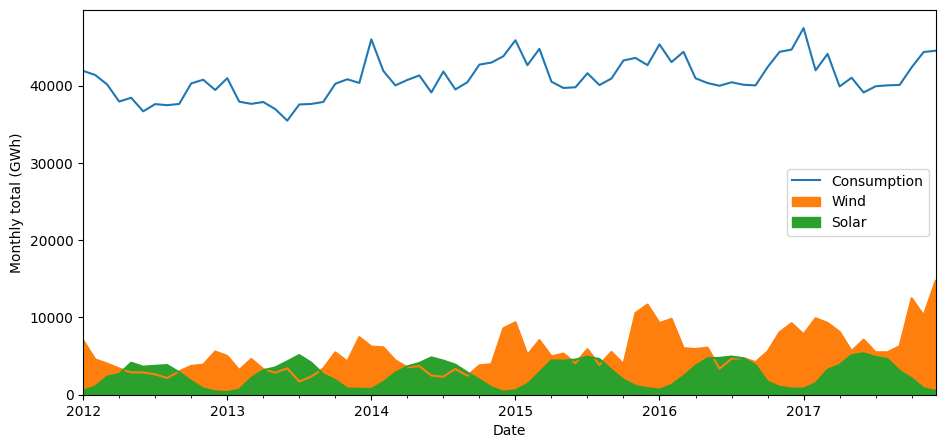

In [767]:
opsd_monthly["Consumption"].plot(figsize=(11, 5))
opsd_monthly["Wind"].plot(kind="area")
opsd_monthly["Solar"].plot(kind="area")
plt.xlabel("Date")
plt.ylabel("Monthly total (GWh)")
plt.legend()
plt.show()

At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.

Explore this further by resampling to annual frequency and computing the ratio of `Wind+Solar` to `Consumption` for each year.

In [754]:
from12to14 = opsd_daily.loc[(opsd_daily.index >= '2012-01-01') & (opsd_daily.index <= '2014-12-31')]
annual_sum = from12to14[['Consumption', 'Solar', 'Wind', 'Wind+Solar']].resample('A').sum()
annual_sum.index = annual_sum.index.year
annual_sum['Wind+Solar/Consumption'] = (annual_sum['Wind'] + (annual_sum['Solar']) / annual_sum['Consumption'])
annual_sum

,Consumption,Solar,Wind,Wind+Solar,Wind+Solar/Consumption
Date,,,,,
2012,469574.754,27887.332,45862.667,73749.999,45862.726388
2013,461241.065,29559.780,47137.663,76697.443,47137.727087
2014,500280.028,32349.800,51020.702,83370.502,51020.766663


Plot the wind + solar share of annual electricity consumption as a bar chart.

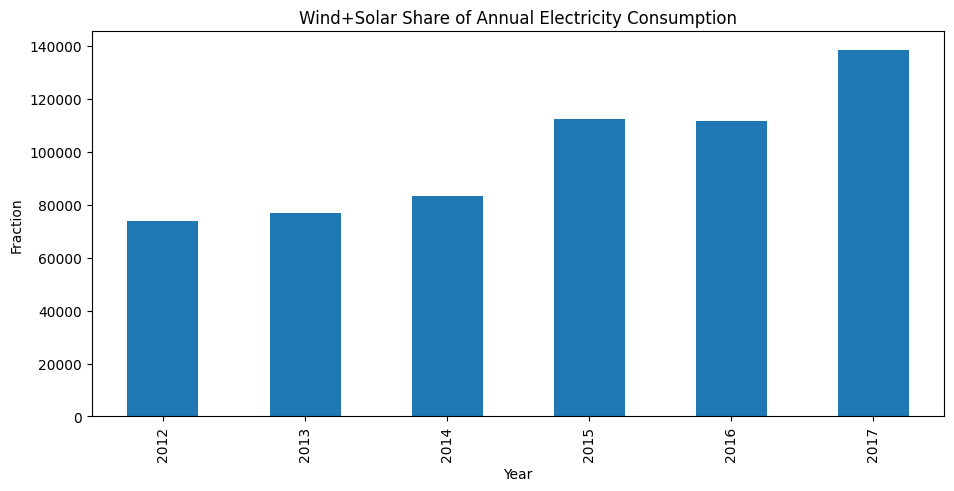

In [755]:
ws_yearly = opsd_daily['Wind+Solar'].resample('Y').sum()
ws_yearly.index = ws_yearly.index.year
ws_yearly.plot.bar(figsize=(11, 5))
plt.xlabel('Year')
plt.ylabel('Fraction')
plt.title('Wind+Solar Share of Annual Electricity Consumption')
plt.show()

We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017.